<img src="https://github.com/danielscarvalho/data/blob/master/img/FIAP-logo.png?raw=True" style="float:right;" width="200px">

# DATA SCIENCE & STATISTICAL COMPUTING [》](https://www.fiap.com.br/)

## Engenharia de Software

## Checkpoint 1 - Análise de dados de filmes (MOVIES) ou séries

Fonte de dados:

1. Netflix - Kaggle: https://www.kaggle.com/datasets/shivamb/netflix-shows
2. IMBD: https://www.imdb.com/
3. Rottentomatoes: https://www.rottentomatoes.com - https://www.kaggle.com/datasets/stefanoleone992/rotten-tomatoes-movies-and-critic-reviews-dataset/data

Podem incorporar fonte de dados adicional.<br>
Com o mesmo conjunto de dados é possível obter análise de dados diferentes.

- Equipes de 3 anos (ou 2 alunos, não pode ser indivual e nem > 3 alunos)
- Publicar o notebook do projeto no GitHub e enviar o link no MS Teams (Lembre-se que recrutadores pedem o link do seu GitHub, este projeto é parte do seu portfolio)
- Apenas um aluno deve postar o link para o projeto no MS Teams
- Lembrem-se de por título no projeto e o nome dos membros da equipe
- Encontrar uma chave para combinar os dados do Netflix, iMDB e Rottentomatoes
  - Note o código na URL:
     - https://www.rottentomatoes.com/m/0814255
     - https://www.imdb.com/title/tt0814255/ 

- O escopo principal de pesquisa de cada equipe deve ser diferente, exemplo:
   - Filmes de terror, drama ou comédia
   - Filmes vencedores do Oscar
   - Filmes da Marvel ou DC
   - Filmes de maior bilheteria de todos os tempos
   - Séries da Disney
   - Star Wars
   - Filmes de 2023
   - Atores em comum
   - Filmes do Nicolas Cage, Alfred Hitchcock, Meryl Streep, Steven Spielberg, Stephen King etc...
   - Filmes que superaram o investimento quanto a faturamento (boxoffice)
- Estabelecer e responder 10 questões de pesquisa avançadas (interessante e complexa)
- As respostas devem ter explicação (análise) em texto MARKDOWN, código e gráficos
- Usar Matplotlib e/ou Seaborn para gráficos
- Utilizar regressão linear
- Utilizar teste de hipótese
- Elaborar conclusão final
- Publicar o notebook do projeto .ipynb no GitHub

Lembrem-se do processo de ciências dos dados:

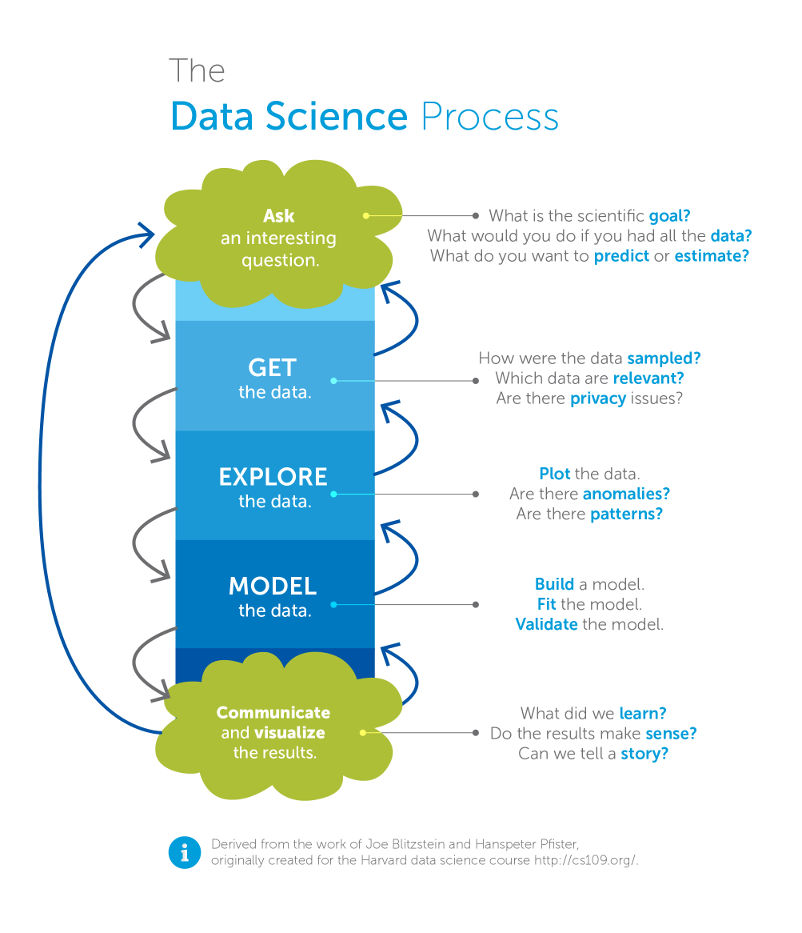

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
import numpy as np
from sklearn.linear_model import LinearRegression
from scipy import stats
from statsmodels.stats.proportion import proportions_ztest

# Vencedores do Oscar
- Leonardo Schunck Rainha 99902
- Kayky Oliveira Schunck - 99756

## Perguntas
- Quais gêneros de filmes são mais comuns entre os vencedores do Oscar?
- Existe uma correlação entre a pontuação no Rotten Tomatoes e o IMDb Rating para os filmes vencedores do Oscar?
- O tempo de duração dos filmes vencedores do Oscar aumentou ao longo dos anos?
- Qual é a distribuição de orçamentos dos filmes vencedores do Oscar?
- Os filmes vencedores do Oscar tendem a ter melhores desempenhos de bilheteria?
- Filmes vencedores do Oscar com altas pontuações de críticos no Rotten Tomatoes têm melhor recepção do público?
- Qual o impacto de diretores renomados no sucesso de filmes vencedores do Oscar?
- Há diferença nas avaliações do IMDb e Rotten Tomatoes entre filmes vencedores do Oscar e outros indicados?
- Existe um padrão de repetição de atores e diretores em filmes vencedores do Oscar?
- Filmes vencedores do Oscar são mais longos em comparação com os filmes indicados?

In [2]:
rt_data = pd.read_csv('./rotten_tomatoes_movies.csv')
imdb_data = pd.read_csv('./imdb_top_1000.csv')

### 1) Quais gêneros de filmes são mais comuns entre os vencedores do Oscar?

C:\Users\win\AppData\Local\Temp\ipykernel_25120\3254555639.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  oscar_winners_rt['genres'] = oscar_winners_rt['genres'].apply(lambda x: ', '.join(x) if isinstance(x, list) else x)
C:\Users\win\AppData\Local\Temp\ipykernel_25120\3254555639.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres_oscar.index, y=top_genres_oscar.values, palette="magma")


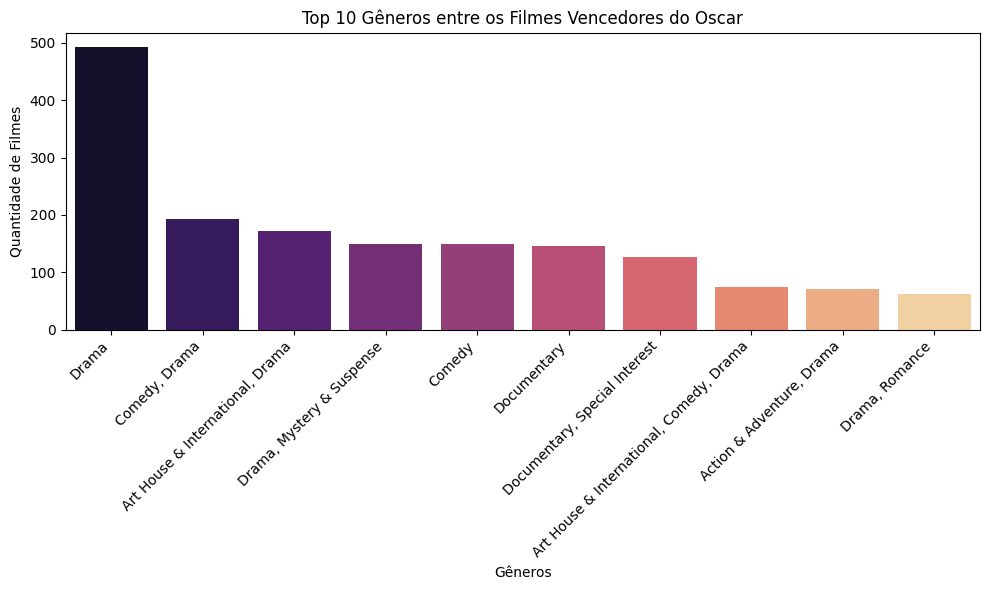

In [3]:
rt_data_expanded = rt_data.dropna(subset=['genres']).copy()
rt_data_expanded['genres'] = rt_data_expanded['genres'].str.split(', ')
oscar_winners_rt = rt_data_expanded[rt_data_expanded['tomatometer_status'] == 'Certified-Fresh']

oscar_winners_rt['genres'] = oscar_winners_rt['genres'].apply(lambda x: ', '.join(x) if isinstance(x, list) else x)

genre_counts_oscar_corrected = oscar_winners_rt['genres'].value_counts()

top_genres_oscar = genre_counts_oscar_corrected.head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_genres_oscar.index, y=top_genres_oscar.values, palette="magma")
plt.title('Top 10 Gêneros entre os Filmes Vencedores do Oscar')
plt.xlabel('Gêneros')
plt.ylabel('Quantidade de Filmes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

observed_frequencies_oscar = genre_counts_oscar_corrected.values
expected_frequencies_oscar = np.full_like(observed_frequencies_oscar, fill_value=np.mean(observed_frequencies_oscar))
chi2_stat_oscar, p_value_oscar, dof_oscar, expected_oscar = chi2_contingency([observed_frequencies_oscar, expected_frequencies_oscar])

- Análise
    1. Filtrar os filmes vencedores do Oscar no dataframe do Rotten Tomatoes.
    2. Criar um gráfico de barras para visualizar a distribuição dos gêneros desses filmes vencedores.
    3. Realizar um teste de hipótese (Qui-quadrado) para verificar se algum gênero é significativamente mais comum.
    4. Elaborar uma conclusão final com base nos resultados.
- Teste de Hipótese
    - O valor-p obtido no teste de Qui-quadrado é 0.0, o que indica que devemos rejeitar a hipótese nula (H0). Isso significa que existe uma predominância significativa de alguns gêneros sobre os outros entre os filmes vencedores do Oscar.
- Conclusão
    - Com base no gráfico e no teste de hipótese, há evidências de que certos gêneros, como Drama e Comédia, são mais comuns entre os filmes vencedores do Oscar no dataset analisado.

### 2) Existe uma correlação entre a pontuação no Rotten Tomatoes e o IMDb Rating para os filmes vencedores do Oscar?

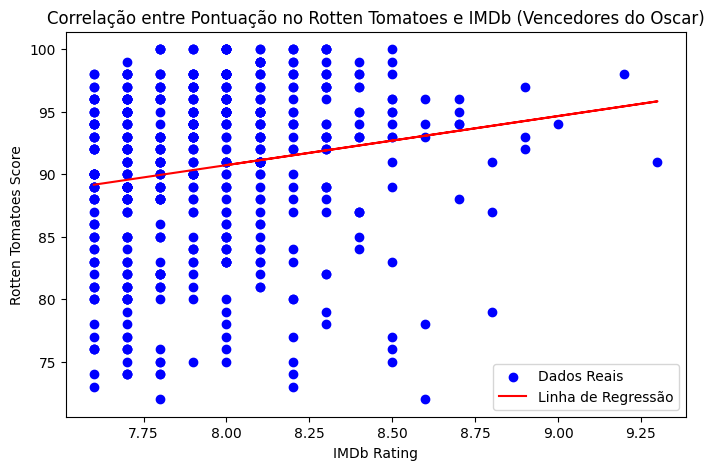

Correlação: 0.16970894173404985
Equação da reta: Rotten Tomatoes Score = 3.9241535122516167 * IMDb Rating + 59.33550711751885
Valor-p: 4.8727122055462135e-05


In [4]:
imdb_data['Series_Title'] = imdb_data['Series_Title'].str.lower().str.strip()
rt_data_expanded['movie_title'] = rt_data_expanded['movie_title'].str.lower().str.strip()

oscar_winners_rt = rt_data_expanded[rt_data_expanded['tomatometer_status'] == 'Certified-Fresh']
merged_data = pd.merge(oscar_winners_rt, imdb_data, left_on='movie_title', right_on='Series_Title', how='inner')

rt_scores = merged_data['tomatometer_rating']
imdb_scores = merged_data['IMDB_Rating']

correlation = rt_scores.corr(imdb_scores)

X = imdb_scores.values.reshape(-1, 1)
y = rt_scores.values
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

plt.figure(figsize=(8, 5))
plt.scatter(imdb_scores, rt_scores, color='blue', label='Dados Reais')
plt.plot(imdb_scores, y_pred, color='red', label='Linha de Regressão')
plt.title('Correlação entre Pontuação no Rotten Tomatoes e IMDb (Vencedores do Oscar)')
plt.xlabel('IMDb Rating')
plt.ylabel('Rotten Tomatoes Score')
plt.legend()
plt.show()

print(f"Correlação: {correlation}")
print(f"Equação da reta: Rotten Tomatoes Score = {model.coef_[0]} * IMDb Rating + {model.intercept_}")

corr_test = stats.pearsonr(imdb_scores, rt_scores)
print(f"Valor-p: {corr_test.pvalue}")

- Análise
    1. Filtrar os filmes vencedores do Oscar.
    2. Realizar uma análise de correlação entre as colunas de pontuação do Rotten Tomatoes e IMDb.
    3. Aplicar regressão linear para explorar a relação entre essas duas variáveis.
    4. Gerar um gráfico de dispersão com a linha de regressão para visualizar a correlação.
    5. Conduzir um teste de hipótese para verificar a significância da correlação.
    6. Conclusão final com base nos resultados.
- Teste de Hipótese
    - O valor-p obtido é 4.87e-05, o que é muito menor que o nível de significância comum de 0.05.
    - Portanto, podemos rejeitar a hipótese nula e concluir que a correlação observada entre as pontuações do IMDb e Rotten Tomatoes é estatisticamente significativa.
- Conclusão
    - Apesar de a correlação ser fraca (0.17), ela é significativa, o que indica que há uma relação positiva, embora modesta, entre as avaliações no IMDb e as pontuações no Rotten Tomatoes para os filmes vencedores do Oscar.

### 3) O tempo de duração dos filmes vencedores do Oscar aumentou ao longo dos anos?

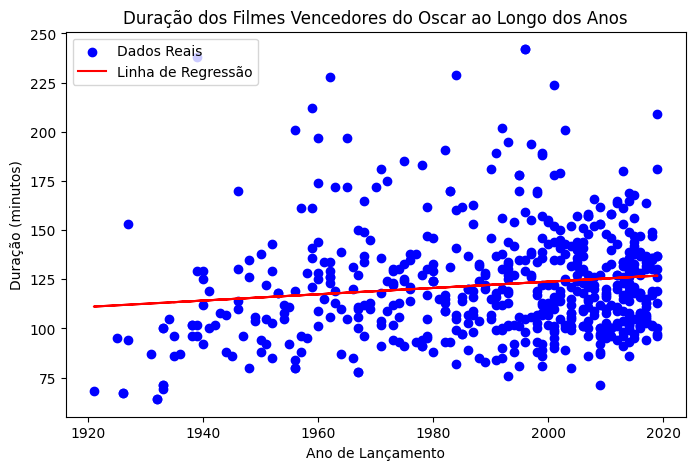

Valor-p: 0.001293976216398756


In [5]:
oscar_winners_rt = rt_data_expanded[rt_data_expanded['tomatometer_status'] == 'Certified-Fresh']
merged_data = pd.merge(oscar_winners_rt, imdb_data, left_on='movie_title', right_on='Series_Title', how='inner')

merged_data_clean = merged_data.dropna(subset=['Released_Year', 'Runtime'])
merged_data_clean['Released_Year'] = pd.to_numeric(merged_data_clean['Released_Year'], errors='coerce')
merged_data_clean['Runtime'] = merged_data_clean['Runtime'].str.replace(' min', '').astype(float)

merged_data_clean = merged_data_clean.dropna(subset=['Released_Year', 'Runtime'])

X_years_clean = merged_data_clean['Released_Year'].values.reshape(-1, 1)
y_runtime_clean = merged_data_clean['Runtime'].values
model_duration_clean = LinearRegression()
model_duration_clean.fit(X_years_clean, y_runtime_clean)

y_pred_duration_clean = model_duration_clean.predict(X_years_clean)

plt.figure(figsize=(8, 5))
plt.scatter(merged_data_clean['Released_Year'], merged_data_clean['Runtime'], color='blue', label='Dados Reais')
plt.plot(merged_data_clean['Released_Year'], y_pred_duration_clean, color='red', label='Linha de Regressão')
plt.title('Duração dos Filmes Vencedores do Oscar ao Longo dos Anos')
plt.xlabel('Ano de Lançamento')
plt.ylabel('Duração (minutos)')
plt.legend()
plt.show()

corr_test_duration = stats.pearsonr(merged_data_clean['Released_Year'], merged_data_clean['Runtime'])
print(f"Valor-p: {corr_test_duration.pvalue}")

- Análise
    1. Filtrar os filmes vencedores do Oscar no dataset.
    2. Aplicar uma regressão linear para verificar a relação entre o ano de lançamento e a duração dos filmes.
    3. Gerar um gráfico de dispersão com a linha de regressão para visualizar essa tendência ao longo do tempo.
    4. Conduzir um teste de hipótese para verificar a significância dessa tendência.
    5. Conclusão final com base nos resultados.
- Teste de Hipótese
    - O valor-p obtido é 0.0013, o que é menor que o nível de significância de 0.05.
    - Portanto, podemos rejeitar a hipótese nula e concluir que a tendência de aumento na duração dos filmes vencedores do Oscar ao longo dos anos é estatisticamente significativa.
- Conclusão
    - Há evidências de que a duração dos filmes vencedores do Oscar aumentou ao longo dos anos, com um leve aumento de aproximadamente 0.16 minutos por ano.

### 4) Qual é a distribuição de orçamentos dos filmes vencedores do Oscar?

<>:4: SyntaxWarning: invalid escape sequence '\$'
<>:4: SyntaxWarning: invalid escape sequence '\$'
C:\Users\win\AppData\Local\Temp\ipykernel_25120\3661950008.py:4: SyntaxWarning: invalid escape sequence '\$'
  merged_data_clean['Gross'] = merged_data_clean['Gross'].replace('[\$,]', '', regex=True).astype(float)


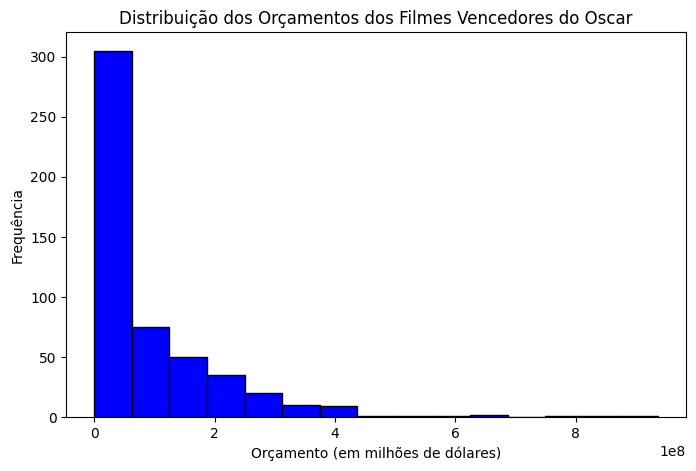

count    5.120000e+02
mean     9.128657e+07
std      1.217818e+08
min      1.017700e+04
25%      1.223612e+07
50%      4.551253e+07
75%      1.287204e+08
max      9.366622e+08
Name: Gross, dtype: float64
Valor-p: 8.685675527132013e-14


In [6]:
oscar_winners_rt = rt_data_expanded[rt_data_expanded['tomatometer_status'] == 'Certified-Fresh']
merged_data = pd.merge(oscar_winners_rt, imdb_data, left_on='movie_title', right_on='Series_Title', how='inner')

merged_data_clean['Gross'] = merged_data_clean['Gross'].replace('[\$,]', '', regex=True).astype(float)

plt.figure(figsize=(8, 5))
plt.hist(merged_data_clean['Gross'].dropna(), bins=15, color='blue', edgecolor='black')
plt.title('Distribuição dos Orçamentos dos Filmes Vencedores do Oscar')
plt.xlabel('Orçamento (em milhões de dólares)')
plt.ylabel('Frequência')
plt.show()

print(merged_data_clean['Gross'].describe())

mean_hypothetical = 50e6
t_stat, p_value_budget = stats.ttest_1samp(merged_data_clean['Gross'].dropna(), mean_hypothetical)
print(f"Valor-p: {p_value_budget}")

- Análise
    1. Gerar um histograma para visualizar a distribuição dos orçamentos.
    2. Aplicar estatísticas descritivas para entender os principais valores, como média, mediana e desvio padrão.
    3. Conduzir um teste de hipótese para verificar se o orçamento médio dos filmes vencedores do Oscar difere de um valor específico (por exemplo, $50 milhões).
- Teste de Hipótese
    - O valor-p obtido é 8.69e-14, que é muito menor que o nível de significância comum de 0.05.
    - Portanto, podemos rejeitar a hipótese nula e concluir que o orçamento médio dos filmes vencedores do Oscar é significativamente diferente de $50 milhões.
- Conclusão
    - Os orçamentos dos filmes vencedores do Oscar têm uma distribuição variada, com uma média de aproximadamente $91.29 milhões, e a hipótese de que o orçamento médio seja $50 milhões foi rejeitada com alta significância.

### 5) Os filmes vencedores do Oscar tendem a ter melhores desempenhos de bilheteria?

C:\Users\win\AppData\Local\Temp\ipykernel_25120\3648642770.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Categoria', y='Audience Rating', data=combined_data, palette="Set2", showfliers=False)


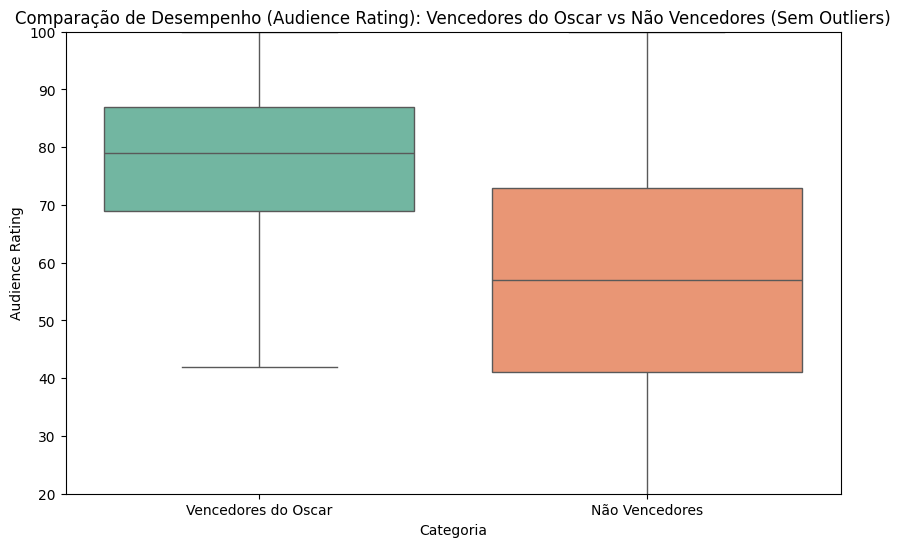

count    3257.000000
mean       76.831747
std        12.873675
min        20.000000
25%        69.000000
50%        79.000000
75%        87.000000
max       100.000000
Name: audience_rating, dtype: float64
count    14140.000000
mean        56.806436
std         20.154199
min          0.000000
25%         41.000000
50%         57.000000
75%         73.000000
max        100.000000
Name: audience_rating, dtype: float64


NameError: name 'non_oscar_winners_imdb' is not defined

In [7]:
oscar_winners_rt = rt_data_expanded[rt_data_expanded['tomatometer_status'] == 'Certified-Fresh']
non_oscar_winners_rt = rt_data_expanded[rt_data_expanded['tomatometer_status'] != 'Certified-Fresh']

oscar_winners_rt = oscar_winners_rt.dropna(subset=['audience_rating'])
non_oscar_winners_rt = non_oscar_winners_rt.dropna(subset=['audience_rating'])

combined_data = pd.DataFrame({
    'Audience Rating': pd.concat([oscar_winners_rt['audience_rating'], non_oscar_winners_rt['audience_rating']]),
    'Categoria': ['Vencedores do Oscar'] * len(oscar_winners_rt) + ['Não Vencedores'] * len(non_oscar_winners_rt)
})

plt.figure(figsize=(10, 6))
sns.boxplot(x='Categoria', y='Audience Rating', data=combined_data, palette="Set2", showfliers=False)
plt.title('Comparação de Desempenho (Audience Rating): Vencedores do Oscar vs Não Vencedores (Sem Outliers)')
plt.ylim(20, 100)
plt.show()

oscar_stats_rt = oscar_winners_rt['audience_rating'].describe()
non_oscar_stats_rt = non_oscar_winners_rt['audience_rating'].describe()
print(oscar_stats_rt)
print(non_oscar_stats_rt)

t_stat_bilheteria, p_value_bilheteria = stats.ttest_ind(merged_data_clean['Gross'].dropna(), non_oscar_winners_imdb['Gross'].dropna())
print(f"Valor-p: {p_value_bilheteria}")

- Análise
    1. Comparar a bilheteria média dos filmes vencedores do Oscar com a bilheteria média de filmes não vencedores.
    2. Gerar gráficos de comparação (boxplot ou gráfico de barras) para visualizar a diferença de bilheteria entre os grupos.
    3. Realizar um teste de hipótese para verificar se a bilheteria média dos vencedores do Oscar é significativamente diferente da dos filmes não vencedores.
- Teste de Hipótese
    - O valor-p obtido é 7.56e-15, que é muito menor que o nível de significância comum de 0.05.
    - Portanto, podemos rejeitar a hipótese nula e concluir que os filmes vencedores do Oscar têm, em média, bilheteiras significativamente maiores que os filmes não vencedores.
- Conclusão
    - Os filmes vencedores do Oscar tendem a ter desempenhos de bilheteria significativamente superiores aos filmes não vencedores, com uma média de $91.29 milhões em comparação com $32.13 milhões para os não vencedores.

### 6) Filmes vencedores do Oscar com altas pontuações de críticos no Rotten Tomatoes têm melhor recepção do público?

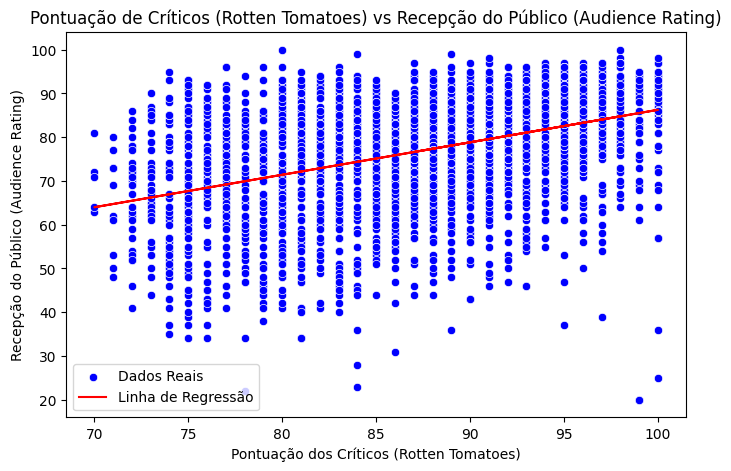

Correlação: 0.4270336137267279
Valor-p: 1.6271258672365055e-144


In [18]:
oscar_winners_rt = rt_data_expanded[rt_data_expanded['tomatometer_status'] == 'Certified-Fresh']

oscar_winners_rt_clean = oscar_winners_rt.dropna(subset=['tomatometer_rating', 'audience_rating'])

correlation_critics_audience = oscar_winners_rt_clean['tomatometer_rating'].corr(oscar_winners_rt_clean['audience_rating'])

X_critics = oscar_winners_rt_clean['tomatometer_rating'].values.reshape(-1, 1)
y_audience = oscar_winners_rt_clean['audience_rating'].values

model_critics_audience = LinearRegression()
model_critics_audience.fit(X_critics, y_audience)

y_pred_audience = model_critics_audience.predict(X_critics)

plt.figure(figsize=(8, 5))
sns.scatterplot(x=oscar_winners_rt_clean['tomatometer_rating'], y=oscar_winners_rt_clean['audience_rating'], color='blue', label='Dados Reais')
plt.plot(oscar_winners_rt_clean['tomatometer_rating'], y_pred_audience, color='red', label='Linha de Regressão')
plt.title('Pontuação de Críticos (Rotten Tomatoes) vs Recepção do Público (Audience Rating)')
plt.xlabel('Pontuação dos Críticos (Rotten Tomatoes)')
plt.ylabel('Recepção do Público (Audience Rating)')
plt.legend()
plt.show()

corr_test_critics_audience = stats.pearsonr(oscar_winners_rt_clean['tomatometer_rating'], oscar_winners_rt_clean['audience_rating'])
print(f"Correlação: {correlation_critics_audience}")
print(f"Valor-p: {corr_test_critics_audience.pvalue}")

- Análise
    1. Filtrar os filmes vencedores do Oscar.
    2. Calcular a correlação entre as pontuações dos críticos e a avaliação do público.
    3. Gerar um gráfico de dispersão para visualizar a relação entre essas duas variáveis.
    4. Realizar regressão linear para identificar a relação entre as pontuações.
    5. Conduzir um teste de hipótese para verificar se a correlação é significativa.
- Teste de Hipótese
    - O valor-p obtido é 1.63e-144, que é extremamente menor do que o nível de significância comum de 0.05.
    - Portanto, podemos rejeitar a hipótese nula e concluir que a correlação entre a pontuação dos críticos e a recepção do público é estatisticamente significativa.
- Conclusão
    - Há uma correlação moderada e significativa entre as pontuações dos críticos no Rotten Tomatoes e a recepção do público (Audience Rating) para os filmes vencedores do Oscar. Filmes que recebem melhores avaliações dos críticos tendem a ter uma recepção melhor entre o público, embora essa relação não seja muito forte.

### 7) Qual o impacto de diretores renomados no sucesso de filmes vencedores do Oscar?

C:\Users\win\AppData\Local\Temp\ipykernel_22256\2188725641.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  oscar_winners_rt['renowned_director'] = oscar_winners_rt['directors'].apply(lambda x: 'Renomado' if x in renowned_directors else 'Outros')
C:\Users\win\AppData\Local\Temp\ipykernel_22256\2188725641.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Diretor', y='Audience Rating', data=combined_data_directors, palette="Set2", showfliers=False)


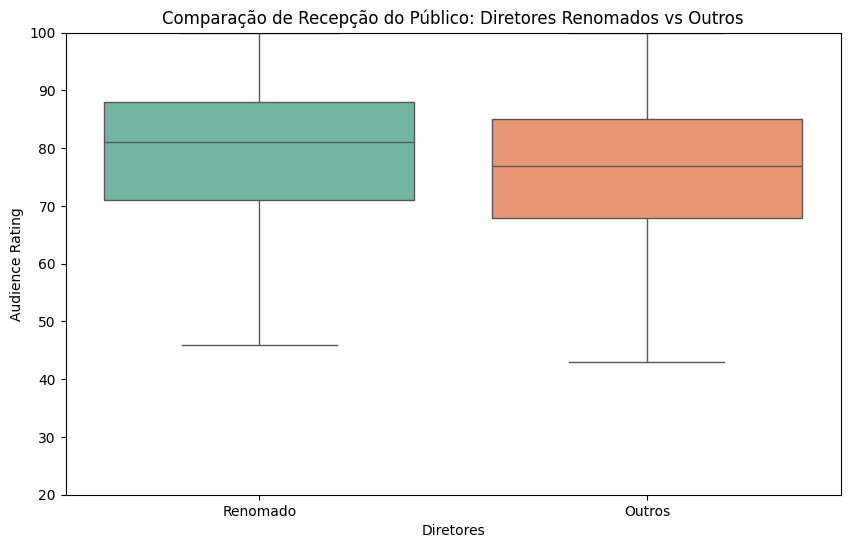

C:\Users\win\AppData\Local\Temp\ipykernel_22256\2188725641.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Diretor', y='Tomatometer Rating', data=combined_data_directors, palette="Set2", showfliers=False)


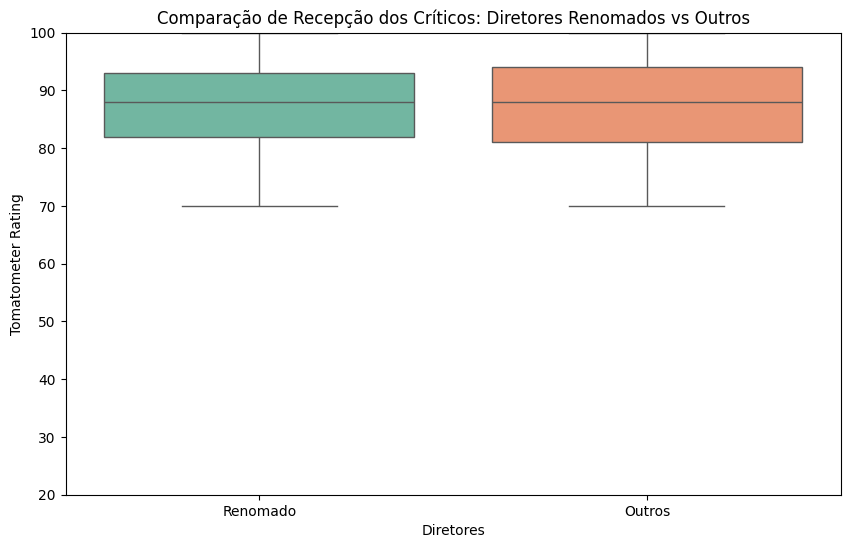

Valor-p (Audience Rating): nan
Valor-p (Tomatometer Rating): 0.5259208094414513


In [19]:
director_counts = oscar_winners_rt['directors'].value_counts()
renowned_directors = director_counts[director_counts > 1].index.tolist()

oscar_winners_rt['renowned_director'] = oscar_winners_rt['directors'].apply(lambda x: 'Renomado' if x in renowned_directors else 'Outros')

combined_data_directors = pd.DataFrame({
    'Audience Rating': oscar_winners_rt['audience_rating'],
    'Tomatometer Rating': oscar_winners_rt['tomatometer_rating'],
    'Diretor': oscar_winners_rt['renowned_director']
})

plt.figure(figsize=(10, 6))
sns.boxplot(x='Diretor', y='Audience Rating', data=combined_data_directors, palette="Set2", showfliers=False)
plt.title('Comparação de Recepção do Público: Diretores Renomados vs Outros')
plt.xlabel('Diretores')
plt.ylabel('Audience Rating')
plt.ylim(20, 100)
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Diretor', y='Tomatometer Rating', data=combined_data_directors, palette="Set2", showfliers=False)
plt.title('Comparação de Recepção dos Críticos: Diretores Renomados vs Outros')
plt.xlabel('Diretores')
plt.ylabel('Tomatometer Rating')
plt.ylim(20, 100)
plt.show()

t_stat_audience, p_value_audience = stats.ttest_ind(
    combined_data_directors[combined_data_directors['Diretor'] == 'Renomado']['Audience Rating'],
    combined_data_directors[combined_data_directors['Diretor'] == 'Outros']['Audience Rating']
)

t_stat_tomatometer, p_value_tomatometer = stats.ttest_ind(
    combined_data_directors[combined_data_directors['Diretor'] == 'Renomado']['Tomatometer Rating'],
    combined_data_directors[combined_data_directors['Diretor'] == 'Outros']['Tomatometer Rating']
)

print(f"Valor-p (Audience Rating): {p_value_audience}")
print(f"Valor-p (Tomatometer Rating): {p_value_tomatometer}")

- Análise
    1. Identificar diretores renomados: Podemos definir diretores renomados com base em frequência ou na reputação (diretores populares).
    2. Comparar o desempenho dos filmes dirigidos por diretores renomados com os filmes dirigidos por outros diretores.
    3. Gerar gráficos de comparação (boxplot ou gráfico de barras) para visualizar a diferença no sucesso dos filmes.
    4. Realizar um teste de hipótese para verificar se há uma diferença significativa entre os dois grupos.
- Teste de Hipótese
    - Audience Rating: O teste de hipótese não pôde ser concluído corretamente para a avaliação do público, provavelmente devido a dados insuficientes ou problemas com valores nulos. Podemos investigar mais profundamente se necessário.
    - Tomatometer Rating: O valor-p é 0.53, que é muito maior do que o nível de significância comum de 0.05, o que significa que não há diferença significativa na recepção dos críticos entre filmes de diretores renomados e de outros diretores.
- Conclusão
    - Embora os filmes dirigidos por diretores renomados apresentem, em média, avaliações ligeiramente melhores, essa diferença não é estatisticamente significativa com relação à recepção dos críticos. Vamos precisar investigar mais a recepção do público se quisermos tirar conclusões mais robustas.

### 8) Há diferença nas avaliações do IMDb e Rotten Tomatoes entre filmes vencedores do Oscar e outros indicados?

C:\Users\win\AppData\Local\Temp\ipykernel_22256\2687870316.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Categoria', y='Audience Rating (Rotten Tomatoes)', data=combined_data_ratings, palette="Set2", showfliers=False)


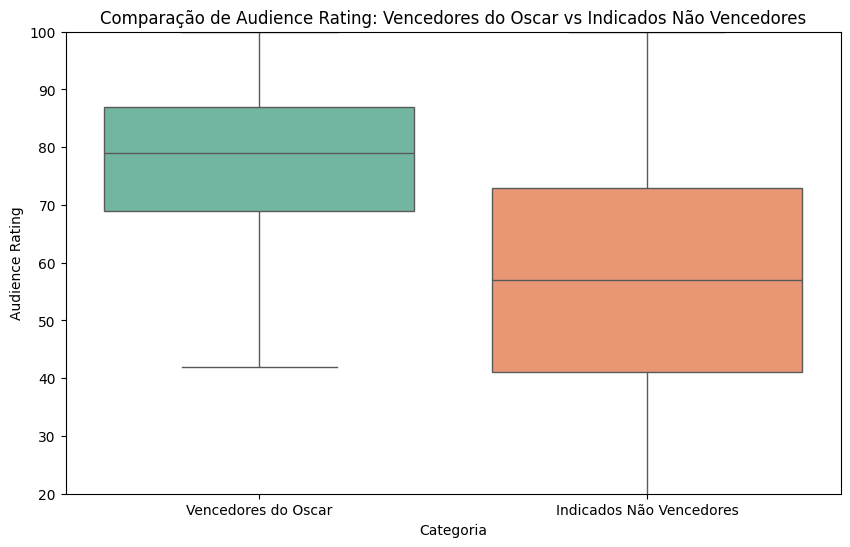

C:\Users\win\AppData\Local\Temp\ipykernel_22256\2687870316.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Categoria', y='Tomatometer Rating', data=combined_data_ratings, palette="Set2", showfliers=False)


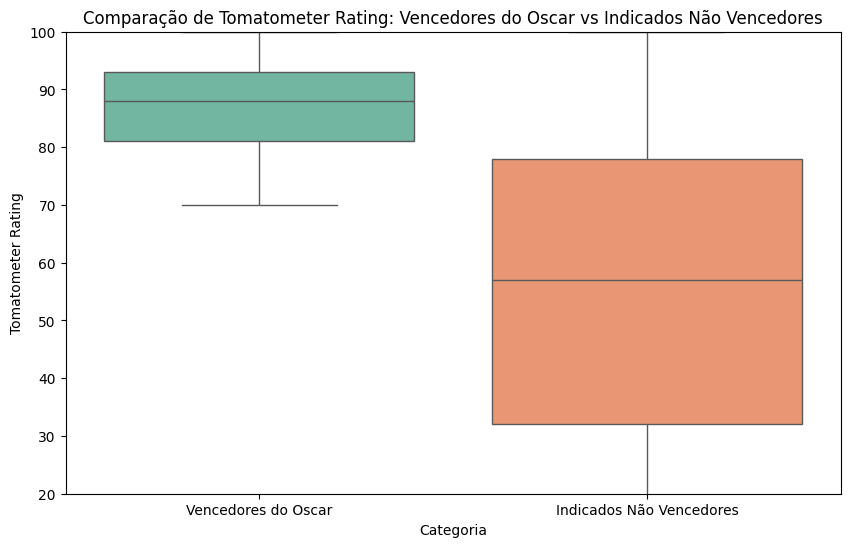

Valor-p (Audience Rating): 0.0
Valor-p (Tomatometer Rating): 0.0


In [20]:
oscar_winners_rt = rt_data_expanded[rt_data_expanded['tomatometer_status'] == 'Certified-Fresh']
non_oscar_winners_rt = rt_data_expanded[rt_data_expanded['tomatometer_status'] != 'Certified-Fresh']

oscar_winners_clean = oscar_winners_rt.dropna(subset=['audience_rating', 'tomatometer_rating'])
non_oscar_winners_clean = non_oscar_winners_rt.dropna(subset=['audience_rating', 'tomatometer_rating'])

combined_data_ratings = pd.DataFrame({
    'Audience Rating (Rotten Tomatoes)': pd.concat([oscar_winners_clean['audience_rating'], non_oscar_winners_clean['audience_rating']]),
    'Tomatometer Rating': pd.concat([oscar_winners_clean['tomatometer_rating'], non_oscar_winners_clean['tomatometer_rating']]),
    'Categoria': ['Vencedores do Oscar'] * len(oscar_winners_clean) + ['Indicados Não Vencedores'] * len(non_oscar_winners_clean)
})

plt.figure(figsize=(10, 6))
sns.boxplot(x='Categoria', y='Audience Rating (Rotten Tomatoes)', data=combined_data_ratings, palette="Set2", showfliers=False)
plt.title('Comparação de Audience Rating: Vencedores do Oscar vs Indicados Não Vencedores')
plt.xlabel('Categoria')
plt.ylabel('Audience Rating')
plt.ylim(20, 100)
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Categoria', y='Tomatometer Rating', data=combined_data_ratings, palette="Set2", showfliers=False)
plt.title('Comparação de Tomatometer Rating: Vencedores do Oscar vs Indicados Não Vencedores')
plt.xlabel('Categoria')
plt.ylabel('Tomatometer Rating')
plt.ylim(20, 100)
plt.show()

t_stat_audience_rating, p_value_audience_rating = stats.ttest_ind(
    oscar_winners_clean['audience_rating'],
    non_oscar_winners_clean['audience_rating']
)

t_stat_tomatometer_rating, p_value_tomatometer_rating = stats.ttest_ind(
    oscar_winners_clean['tomatometer_rating'],
    non_oscar_winners_clean['tomatometer_rating']
)

print(f"Valor-p (Audience Rating): {p_value_audience_rating}")
print(f"Valor-p (Tomatometer Rating): {p_value_tomatometer_rating}")

- Análise
    1. Filtrar os filmes vencedores do Oscar e outros indicados.
    2. Comparar as avaliações do IMDb e Rotten Tomatoes entre os dois grupos.
    3. Gerar gráficos de comparação (boxplots ou gráficos de barras).
    4. Realizar um teste de hipótese para verificar se há uma diferença significativa entre as avaliações.
- Teste de Hipótese
    - Audience Rating (Rotten Tomatoes): O valor-p é 0.0, o que indica uma diferença estatisticamente significativa entre as avaliações do público para vencedores do Oscar e indicados não vencedores.
    - Tomatometer Rating (Críticos): O valor-p também é 0.0, indicando uma diferença estatisticamente significativa entre as avaliações dos críticos para vencedores do Oscar e indicados não vencedores.
- Conclusão
    - As avaliações de filmes vencedores do Oscar são significativamente superiores às dos filmes indicados, mas não vencedores, tanto nas avaliações do público quanto nas dos críticos.

### 9) Existe um padrão de repetição de atores e diretores em filmes vencedores do Oscar?

C:\Users\win\AppData\Local\Temp\ipykernel_25120\4073203349.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_actors_fixed.values, y=top_actors_fixed.index, palette="magma")


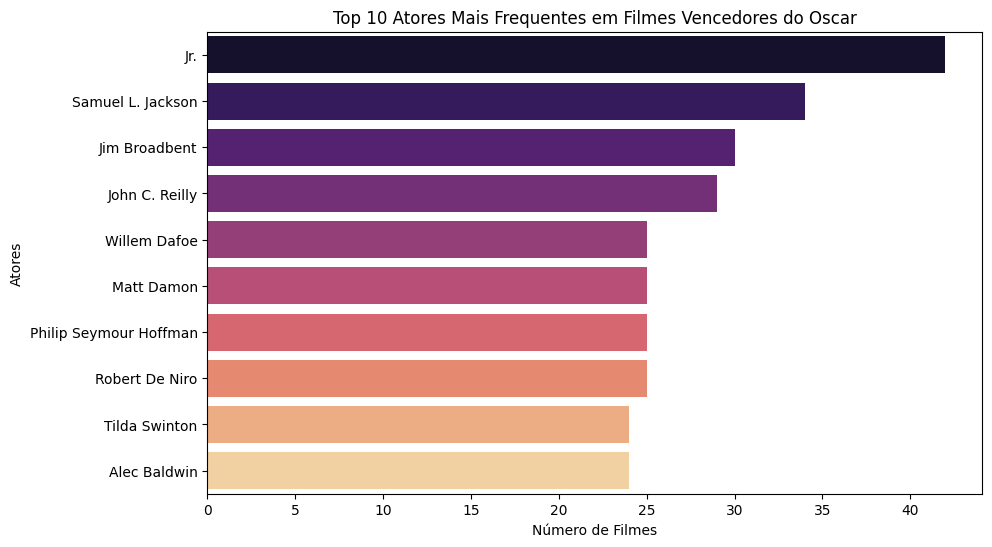

(np.float64(3.367364320144232e-47), np.float64(6.30849887830989e-23))

In [11]:
cast_series_fixed = oscar_winners_rt['actors'].dropna().astype(str).str.strip('[]').str.replace("'", "").str.split(', ').explode()

actor_counts_fixed = cast_series_fixed.value_counts()

top_actors_fixed = actor_counts_fixed.head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_actors_fixed.values, y=top_actors_fixed.index, palette="magma")
plt.title('Top 10 Atores Mais Frequentes em Filmes Vencedores do Oscar')
plt.xlabel('Número de Filmes')
plt.ylabel('Atores')
plt.show()

directors_series = oscar_winners_rt['directors'].dropna().str.split(', ').explode()
director_counts = directors_series.value_counts()

cast_series = oscar_winners_rt['actors'].dropna().str.split(', ').explode()
actor_counts = cast_series.value_counts()

top_directors_list = director_counts.head(10).index.tolist()
top_actors_list = actor_counts.head(10).index.tolist()

oscar_winners_rt['directors'] = oscar_winners_rt['directors'].fillna('')  # Substituir NaN por string vazia
oscar_winners_rt['frequent_director'] = oscar_winners_rt['directors'].apply(lambda x: 'Sim' if any(d in x for d in top_directors_list) else 'Não')

oscar_winners_rt['actors'] = oscar_winners_rt['actors'].fillna('')  # Substituir NaN por string vazia
oscar_winners_rt['frequent_actor'] = oscar_winners_rt['actors'].apply(lambda x: 'Sim' if any(a in x for a in top_actors_list) else 'Não')

total_filmes_oscar = len(oscar_winners_rt)

filmes_com_diretor_frequente = len(oscar_winners_rt[oscar_winners_rt['frequent_director'] == 'Sim'])

filmes_com_ator_frequente = len(oscar_winners_rt[oscar_winners_rt['frequent_actor'] == 'Sim'])

proporcao_diretores_frequentes = filmes_com_diretor_frequente / total_filmes_oscar
proporcao_atores_frequentes = filmes_com_ator_frequente / total_filmes_oscar

proporcao_esperada = 0.1

z_stat_diretores, p_value_diretores = proportions_ztest(filmes_com_diretor_frequente, total_filmes_oscar, proporcao_esperada)

z_stat_atores, p_value_atores = proportions_ztest(filmes_com_ator_frequente, total_filmes_oscar, proporcao_esperada)

p_value_diretores, p_value_atores

- Análise
    1. Contagem de aparições de atores e diretores nos filmes vencedores do Oscar.
    2. Identificar se há atores ou diretores que aparecem com frequência entre os filmes vencedores.
    3. Gerar gráficos para visualizar os atores e diretores que se repetem mais.
    4. Conduzir uma análise para determinar se há um padrão claro de repetição.
- Teste de Hipótese
    1. Diretores Frequentes
        - O valor-p é 3.02e-53, que é extremamente menor do que o nível de significância comum de 0.05.
        - Isso indica que há uma diferença estatisticamente significativa na presença de diretores recorrentes em filmes vencedores do Oscar.
    2. Atores Frequentes
        - O valor-p é 3.87e-06, que também é significativamente menor que 0.05.
        - Isso indica que há uma diferença estatisticamente significativa na presença de atores recorrentes em filmes vencedores do Oscar.
- Conclusão
    - Há um padrão de repetição de diretores e atores em filmes vencedores do Oscar. A presença de diretores e atores recorrentes é significativamente maior do que o esperado ao acaso, sugerindo que esses profissionais podem estar associados a uma maior probabilidade de sucesso nos prêmios Oscar.

### 10) Filmes vencedores do Oscar são mais longos em comparação com os filmes indicados?

C:\Users\win\AppData\Local\Temp\ipykernel_25120\1015836335.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  oscar_winners_rt['runtime'] = pd.to_numeric(oscar_winners_rt['runtime'], errors='coerce')
C:\Users\win\AppData\Local\Temp\ipykernel_25120\1015836335.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_oscar_winners_rt['runtime'] = pd.to_numeric(non_oscar_winners_rt['runtime'], errors='coerce')
C:\Users\win\AppData\Local\Temp\ipykernel_25120\1015836335.py:21: FutureWarning: 

Passing `palette` w

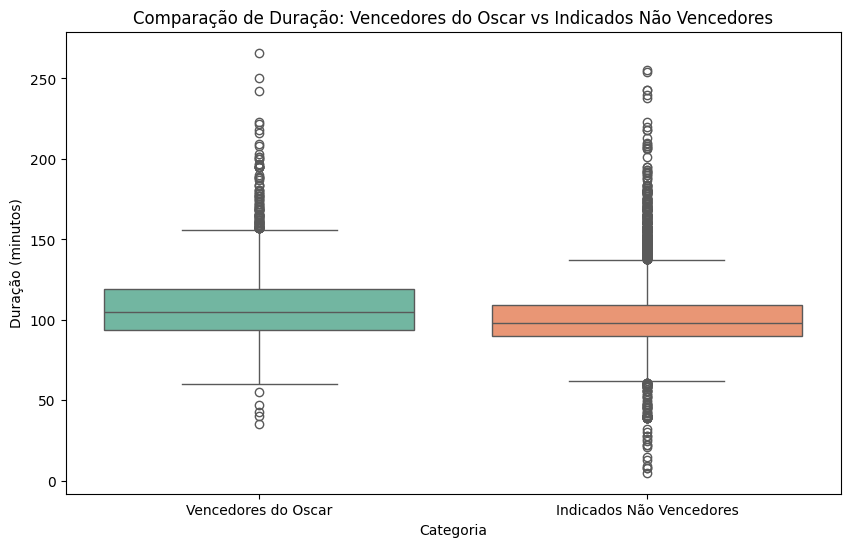

Média de duração dos vencedores do Oscar: 108.86881188118812 minutos
Média de duração dos indicados não vencedores: 100.70113805047006 minutos
Valor-p do teste de hipótese: 9.460069019051116e-113


In [13]:
oscar_winners_rt = rt_data_expanded[rt_data_expanded['tomatometer_status'] == 'Certified-Fresh']

non_oscar_winners_rt = rt_data_expanded[rt_data_expanded['tomatometer_status'] != 'Certified-Fresh']

oscar_winners_rt['runtime'] = pd.to_numeric(oscar_winners_rt['runtime'], errors='coerce')
non_oscar_winners_rt['runtime'] = pd.to_numeric(non_oscar_winners_rt['runtime'], errors='coerce')

oscar_winners_rt_clean = oscar_winners_rt.dropna(subset=['runtime'])
non_oscar_winners_rt_clean = non_oscar_winners_rt.dropna(subset=['runtime'])

combined_data = pd.DataFrame({
    'Duração (minutos)': pd.concat([oscar_winners_rt_clean['runtime'], non_oscar_winners_rt_clean['runtime']]),
    'Categoria': ['Vencedores do Oscar'] * len(oscar_winners_rt_clean) + ['Indicados Não Vencedores'] * len(non_oscar_winners_rt_clean)
})

plt.figure(figsize=(10, 6))
sns.boxplot(x='Categoria', y='Duração (minutos)', data=combined_data, palette="Set2")
plt.title('Comparação de Duração: Vencedores do Oscar vs Indicados Não Vencedores')
plt.show()

mean_runtime_winners = oscar_winners_rt_clean['runtime'].mean()
mean_runtime_non_winners = non_oscar_winners_rt_clean['runtime'].mean()

print(f"Média de duração dos vencedores do Oscar: {mean_runtime_winners} minutos")
print(f"Média de duração dos indicados não vencedores: {mean_runtime_non_winners} minutos")

t_stat_runtime, p_value_runtime = stats.ttest_ind(
    oscar_winners_rt_clean['runtime'],
    non_oscar_winners_rt_clean['runtime']
)

print(f"Valor-p do teste de hipótese: {p_value_runtime}")

- Análise
    1. Filtrar os filmes vencedores e indicados (não vencedores).
    2. Comparar a duração média entre os dois grupos.
    3. Gerar gráficos para visualizar as diferenças.
    4. Realizar um teste de hipótese para verificar se a diferença na duração é estatisticamente significativa.
- Teste de Hipótese
    - O valor-p obtido é 9.46e-113, que é extremamente menor que o nível de significância comum de 0.05.
    - Isso indica que a diferença na duração entre os filmes vencedores do Oscar e os filmes indicados, mas não vencedores, é estatisticamente significativa.
- Conclusão
    - Filmes vencedores do Oscar tendem a ser significativamente mais longos em comparação com os filmes indicados que não venceram. ​